In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons
import pandas as pd

In [ ]:
x_moon , y_moon=make_moons(n_samples=1500 , noise=0.1 , random_state=42)        # defining the dataset

x_moon=pd.DataFrame(x_moon)                           #x_moon containes 2 independent features and converted to dataframe
x_moon.head()                        # printing top entries of the x_moon dataframe

,0,1
0,0.981321,-0.499666
1,1.844094,0.072311
2,-0.060090,1.048577
3,-0.174089,1.099558
4,-0.464776,0.877356


In [ ]:
y_moon=pd.DataFrame(y_moon)
y_moon.head()

,0
0,1
1,1
2,0
3,0
4,0


In [ ]:
x_train ,x_test , y_train ,y_test=train_test_split(x_moon , y_moon , test_size=0.2 ,random_state=42,shuffle=True)   # splitting data into train and test set
scaler=StandardScaler()                                                      # to standardize the features in x_moon
x_train=pd.DataFrame(scaler.fit_transform(x_train),columns=x_train.columns)              # scaled data is then converted to dataframe
x_test=pd.DataFrame(scaler.transform(x_test),columns=x_test.columns)

x_train.head()
print('\n')
x_test.head()

,0,1
0,-0.160773,1.246588
1,-1.497207,0.083114
2,-0.241314,1.438518
3,0.346650,0.499827
4,-1.309785,0.994431


In [ ]:
input_ds=torch.tensor(x_train.values , dtype=torch.float32)                    #converting training data into tensors
label_ds=torch.tensor(y_train.values , dtype=torch.float32).view(-1,1)

In [ ]:
from torch.utils.data import TensorDataset , DataLoader
import torch.nn.functional as F

In [ ]:
loss_fn=F.binary_cross_entropy                                             # initializing cross entropy function

In [ ]:
class onelayernn(nn.Module):
  def __init__(self,input_size,hidden_size,output_size):
    super(onelayernn,self).__init__()

    self.layer1=nn.Linear(input_size,output_size)                             # single layer
    self.sigmoid=nn.Sigmoid()                                                 # sigmoid function

  def forward(self,x):
    x=self.sigmoid(self.layer1(x))                                             #applying sigmoid to final layer
    return x

input=2
hidden=0
output=1
model=onelayernn(input,hidden,output)

In [ ]:
train_ds=TensorDataset(input_ds,label_ds)                           # mapping an input to it's corressponding label
train_dl=DataLoader(train_ds,batch_size=50,shuffle=True)                # dividing train_ds into mini batches of fixed sizes

In [ ]:
opt=torch.optim.SGD(model.parameters(),lr=1e-4)                        # initializing SGD optimizer

In [ ]:
def train(model, train_dl,loss_fn,opt,epoch):
  for e in range(epoch):
    model.train()                              # setting model to evaluation mode
    for x , y in train_dl:
      opt.zero_grad()                          # setting grad to zer
      output=model(x)
      loss=loss_fn(output,y)v
      loss.backward()                           # computing gradients
      opt.step()                                     # back propagation
      if (e + 1) % 10 == 0:
            print(f"Epoch [{e+1}/{epoch}], Loss: {loss.item():.4f}")               #printing loss after 10 epochs

train(model,train_dl,loss_fn,opt,10000)

Streaming output truncated to the last 5000 lines.
Epoch [7920/10000], Loss: 0.2178
Epoch [7920/10000], Loss: 0.2003
Epoch [7920/10000], Loss: 0.2822
Epoch [7920/10000], Loss: 0.2110
Epoch [7920/10000], Loss: 0.2926
Epoch [7920/10000], Loss: 0.1918
Epoch [7920/10000], Loss: 0.2291
Epoch [7920/10000], Loss: 0.2906
Epoch [7930/10000], Loss: 0.1832
Epoch [7930/10000], Loss: 0.2315
Epoch [7930/10000], Loss: 0.3180
Epoch [7930/10000], Loss: 0.2152
Epoch [7930/10000], Loss: 0.1952
Epoch [7930/10000], Loss: 0.2447
Epoch [7930/10000], Loss: 0.3664
Epoch [7930/10000], Loss: 0.2377
Epoch [7930/10000], Loss: 0.2221
Epoch [7930/10000], Loss: 0.2898
Epoch [7930/10000], Loss: 0.2760
Epoch [7930/10000], Loss: 0.2506
Epoch [7930/10000], Loss: 0.4291
Epoch [7930/10000], Loss: 0.2166
Epoch [7930/10000], Loss: 0.2576
Epoch [7930/10000], Loss: 0.1620
Epoch [7930/10000], Loss: 0.2713
Epoch [7930/10000], Loss: 0.2514
Epoch [7930/10000], Loss: 0.2833
Epoch [7930/10000], Loss: 0.3395
Epoch [7930/10000], Loss:

In [ ]:
class fivelayernn(nn.Module):
  def __init__(self , input_size , hidden_size, output_size):
    super(fivelayernn,self).__init__()

    self.layer11=nn.Linear(input_size ,hidden_size)                   # layer 1
    self.layer22=nn.Linear(hidden_size ,hidden_size)                    # layer 2
    self.layer33=nn.Linear(hidden_size ,hidden_size)               #layer 3

    self.layer55=nn.Linear(hidden_size ,output_size)                   #layer 4
    self.reLu=nn.ReLU()
    self.sigmoid=nn.Sigmoid()                                  # sigmoid activation function

  def forward(self , x):                                       # feed forward function
    x=self.reLu(self.layer11(x))
    x=self.reLu(self.layer22(x))                                        #applying relu to hidden layers
    x=self.reLu(self.layer33(x))
    x=self.sigmoid(self.layer55(x))                                #applying sigmoid to last layer
    return x

model1=fivelayernn(input,10,output)
opt1=torch.optim.SGD(model1.parameters(),lr=1e-3)

In [ ]:
def training(model1 ,loss_fn ,opt1 ,epoch ,train_dl):
  for e in range(epoch):
    model1.train()
    for x , y in train_dl:
      opt1.zero_grad()
      output=model1(x);
      loss=loss_fn(output,y)
      loss.backward()
      opt1.step()
      if (e + 1) % 10 == 0:
            print(f"Epoch [{e+1}/{epoch}], Loss: {loss.item():.4f}")

training(model1,loss_fn,opt1,10000,train_dl)


Streaming output truncated to the last 5000 lines.
Epoch [7920/10000], Loss: 0.0030
Epoch [7920/10000], Loss: 0.0040
Epoch [7920/10000], Loss: 0.0032
Epoch [7920/10000], Loss: 0.0037
Epoch [7920/10000], Loss: 0.0077
Epoch [7920/10000], Loss: 0.0017
Epoch [7920/10000], Loss: 0.0158
Epoch [7920/10000], Loss: 0.0053
Epoch [7930/10000], Loss: 0.0035
Epoch [7930/10000], Loss: 0.0043
Epoch [7930/10000], Loss: 0.0020
Epoch [7930/10000], Loss: 0.0015
Epoch [7930/10000], Loss: 0.0016
Epoch [7930/10000], Loss: 0.0015
Epoch [7930/10000], Loss: 0.0105
Epoch [7930/10000], Loss: 0.0537
Epoch [7930/10000], Loss: 0.0057
Epoch [7930/10000], Loss: 0.0018
Epoch [7930/10000], Loss: 0.0029
Epoch [7930/10000], Loss: 0.0018
Epoch [7930/10000], Loss: 0.0024
Epoch [7930/10000], Loss: 0.0098
Epoch [7930/10000], Loss: 0.0021
Epoch [7930/10000], Loss: 0.0017
Epoch [7930/10000], Loss: 0.0062
Epoch [7930/10000], Loss: 0.0123
Epoch [7930/10000], Loss: 0.0034
Epoch [7930/10000], Loss: 0.0022
Epoch [7930/10000], Loss:

In [ ]:
x_test=pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)               # scaling and converting test data into dataframe

input_test=torch.tensor(x_test.values ,dtype=torch.float32)                          # converting dataframe to tensors
label_test=torch.tensor(y_test.values ,dtype=torch.float32).view(-1,1)

test_ds=TensorDataset(input_test , label_test)
test_dl=DataLoader(test_ds,batch_size=40 , shuffle=True)

def test_onenn(model, loss_fn , test_dl):
    model.eval()                                                                  # setting model to evaluation mode
    total_loss = 0
    correct = 0
    wrong = 0
    with torch.no_grad():                                                          # stopping gradient computation
        for x, y in test_dl:
            output = model(x)
            total_loss += loss_fn(output, y)


            predicted = (output > 0.5).float()

            correct+= (predicted==y).sum().item()                                  # summing total number of correct predictions
            wrong += (predicted != y).sum().item()                                   #summing wrong predictions

    # Print the number of correct and wrong predictions
    print(f"Correct predictions: {correct}")
    print(f"Wrong predictions: {wrong}")
    print(f"Total Loss: {total_loss.item() / len(test_dl):.4f}")

test_onenn(model, loss_fn , test_dl)



Correct predictions: 243
Wrong predictions: 57
Total Loss: 15.5697


In [ ]:
def test_fivenn(model1, loss_fn , test_dl):
    model1.eval()
    total_loss1 = 0
    correct1 = 0
    wrong1 = 0
    with torch.no_grad():
        for x, y in test_dl:
            output = model1(x)
            total_loss1 += loss_fn(output, y)


            predicted = (output > 0.5).float()
            #print('\n',predicted , "-> ",y)
            correct1 += (predicted == y).sum().item()
            wrong1 += (predicted != y).sum().item()


    print(f"Correct predictions: {correct1}")
    print(f"Wrong predictions: {wrong1}")
    print(f"Total Loss: {total_loss1.item() / len(test_dl):.4f}")

test_fivenn(model1 , loss_fn , test_dl)


Correct predictions: 265
Wrong predictions: 35
Total Loss: 2.8345


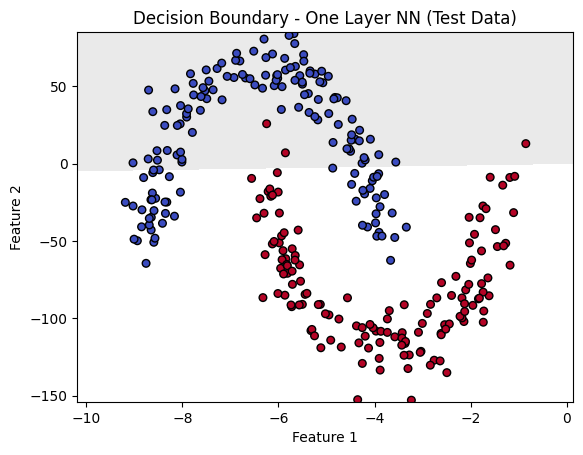

In [ ]:
import numpy as np
def plot_decision_boundary(model, x_data, y_data, resolution=0.02):
    x_min, x_max = x_data[:, 0].min() - 1, x_data[:, 0].max() + 1
    y_min, y_max = x_data[:, 1].min() - 1, x_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))

    # Convert grid points to tensor and make predictions
    grid_points = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
    with torch.no_grad():
        model.eval()
        zz = model(grid_points).numpy().reshape(xx.shape)

    # Plot the contour map of the decision boundary
    plt.contourf(xx, yy, zz, levels=[0, 0.5], cmap='coolwarm', alpha=0.6)
    plt.scatter(x_data[:, 0], x_data[:, 1], c=y_data, cmap='coolwarm', edgecolors='k', s=30)
    plt.title("Decision Boundary - One Layer NN (Test Data)")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Visualize decision boundary for the OneLayerNN on the test data
plot_decision_boundary(model, input_test.numpy(), label_test.numpy())

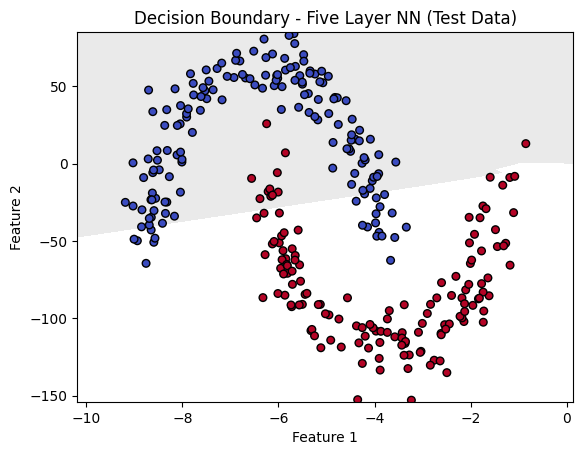

In [ ]:
def plot_decision_boundary(model, x_data, y_data, resolution=0.02):
    x_min, x_max = x_data[:, 0].min() - 1, x_data[:, 0].max() + 1
    y_min, y_max = x_data[:, 1].min() - 1, x_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))


    grid_points = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
    with torch.no_grad():
        model.eval()
        zz = model(grid_points).numpy().reshape(xx.shape)

    # Plot the contour map of the decision boundary
    plt.contourf(xx, yy, zz, levels=[0, 0.5], cmap='coolwarm', alpha=0.6)
    plt.scatter(x_data[:, 0], x_data[:, 1], c=y_data, cmap='coolwarm', edgecolors='k', s=30)
    plt.title("Decision Boundary - Five Layer NN (Test Data)")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

plot_decision_boundary(model1, input_test.numpy(), label_test.numpy())